In [1]:
# Slide 17: 


synprod <- data.frame("Acontent"=c(1,0,0.5), 					  
                      "Bcontent"=c(0,1,0.5), 
		         "Qual"=c(90,30,75)) 

glmSyn <- lm(Qual ~ Acontent + Bcontent - 1, data=synprod) 

summary(glmSyn)


Call:
lm(formula = Qual ~ Acontent + Bcontent - 1, data = synprod)

Residuals:
 1  2  3 
-5 -5 10 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)  
Acontent    95.00      11.18   8.497   0.0746 .
Bcontent    35.00      11.18   3.130   0.1968  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.25 on 1 degrees of freedom
Multiple R-squared:  0.9897,	Adjusted R-squared:  0.9692 
F-statistic: 48.25 on 2 and 1 DF,  p-value: 0.1013


In [2]:
# Slide 18:

glmSynA <- lm(Qual ~ Acontent - 1, data=synprod) 
summary(glmSynA)


Call:
lm(formula = Qual ~ Acontent - 1, data = synprod)

Residuals:
  1   2   3 
-12  30  24 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)  
Acontent   102.00      25.46   4.007    0.057 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.46 on 2 degrees of freedom
Multiple R-squared:  0.8892,	Adjusted R-squared:  0.8338 
F-statistic: 16.06 on 1 and 2 DF,  p-value: 0.05701


In [3]:
# Slide 25

X<-as.matrix(synprod[,1:2])
Y<-as.matrix(synprod[,3])
theta<-solve(t(X)%*%X)%*%t(X)%*%Y
res<-Y-X%*%theta

X1<-as.matrix(synprod[,1])
theta1<-solve(t(X1)%*%X1)%*%t(X1)%*%Y
res1<-Y-X1%*%theta1

#P_MY-P_HY:
res-res1

# ||Y-P_MY||^2:
sum(res^2)

Q_F<-sum((res-res1)^2)/sum(res^2)

1-pf(Q_F,1,1)

7
-35
-14


[1] 150

[1] 0.1968386

In [4]:
# Slide 26:

anova(glmSyn)

Anova(glmSyn)

Anova(glmSyn,type=3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Acontent,1,13005,13005,86.7,0.06810973
Bcontent,1,1470,1470,9.8,0.19683858
Residuals,1,150,150,NA,NA


ERROR: Error in Anova(glmSyn): could not find function "Anova"


In [5]:
# Slide 27:

drop1(glmSyn,test="F")

temp <- lm(Qual ~ Bcontent + Acontent -1, data=synprod) 
anova(temp)

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,150,15.73607,NA,NA
Acontent,1,10830,10980,26.61566,72.2,0.07457932
Bcontent,1,1470,1620,20.87471,9.8,0.19683858


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Bcontent,1,3645,3645,24.3,0.12741578
Acontent,1,10830,10830,72.2,0.07457932
Residuals,1,150,150,NA,NA


In [6]:
# Slide 29:

summary(glmSyn)$cov.unscaled
summary(glmSyn)$sigma^2*summary(glmSyn)$cov.unscaled

,Acontent,Bcontent
Acontent,0.8333333,-0.1666667
Bcontent,-0.1666667,0.8333333


,Acontent,Bcontent
Acontent,125,-25
Bcontent,-25,125


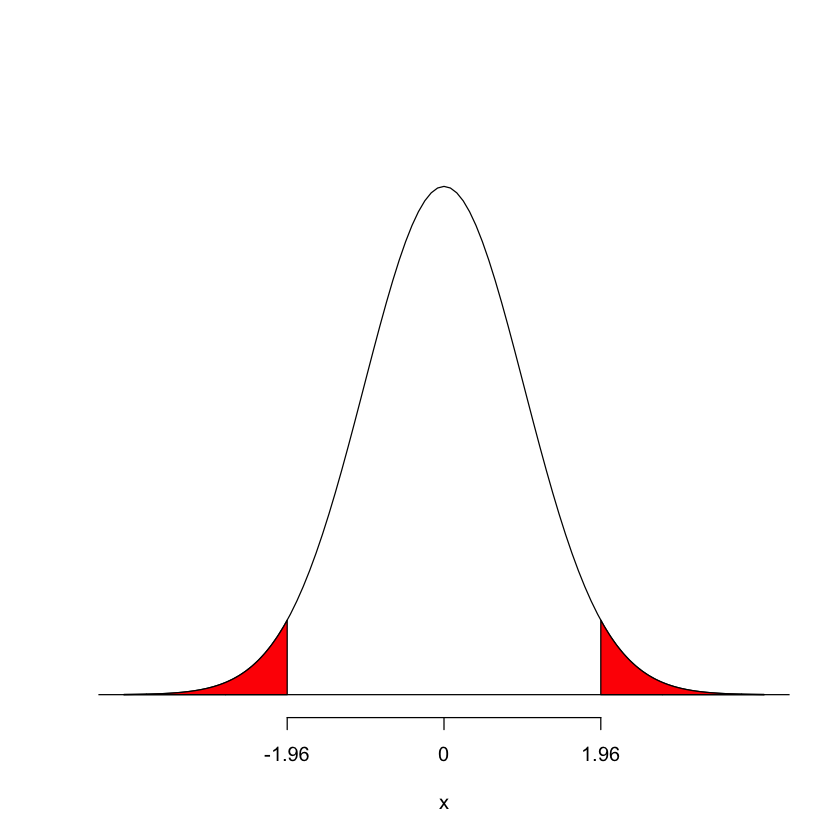

In [7]:
# Slide 34:

curve(dnorm,-4,4,axes=F,ylab='',ylim=c(0,0.45))
lines(c(-5,5),rep(0,2))
polygon(c((-400):(-196)/100,rev((-400):(-196)/100)),
        c(rep(0,205),dnorm(rev((-400):(-196)/100))),col="red")
polygon(c((400):(196)/100,rev((400):(196)/100)),
        c(rep(0,205),dnorm(rev((400):(196)/100))),col="red")
axis(1,labels=c("-1.96","0","1.96"),at=c(-1.96,0,1.96))

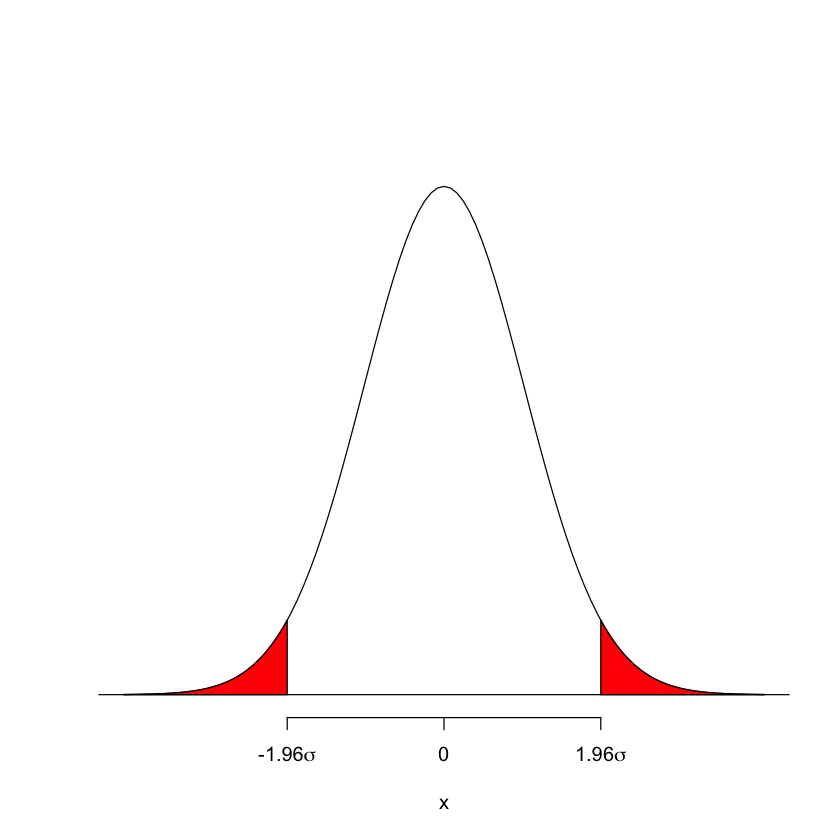

In [8]:
# Slide 35:


curve(dnorm,-4,4,axes=F,ylab='',ylim=c(0,0.45))
lines(c(-5,5),rep(0,2))
polygon(c((-400):(-196)/100,rev((-400):(-196)/100)),
        c(rep(0,205),dnorm(rev((-400):(-196)/100))),col="red")
polygon(c((400):(196)/100,rev((400):(196)/100)),
        c(rep(0,205),dnorm(rev((400):(196)/100))),col="red")
axis(1,labels=c(expression(paste("-1.96",sigma)),"0",
                expression(paste("1.96",sigma))),
     at=c(-1.96,0,1.96))

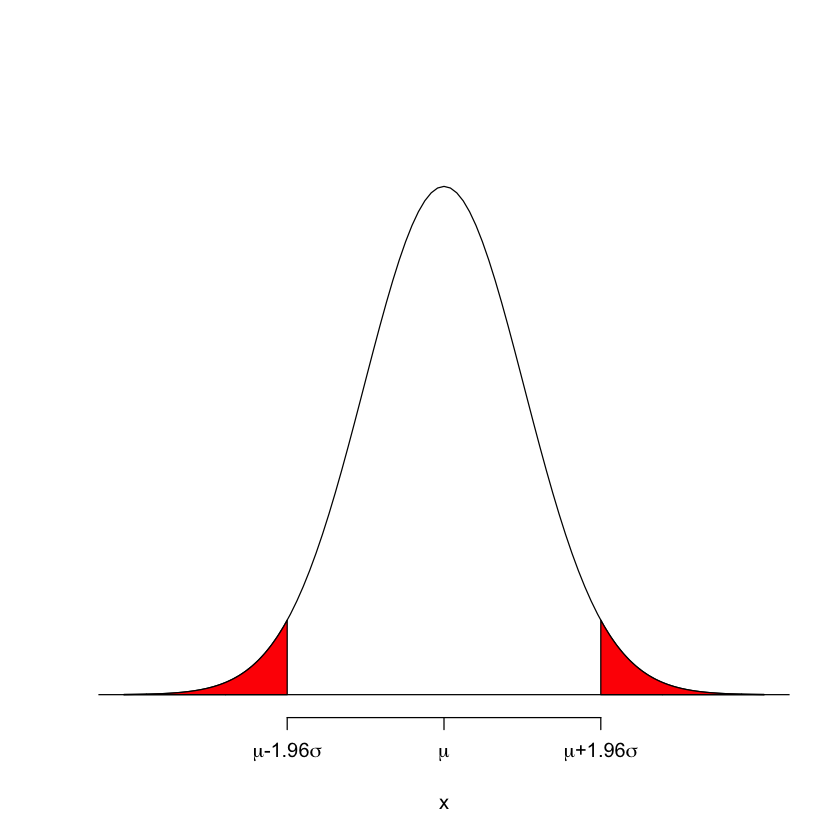

In [9]:
# Slide 36:


curve(dnorm,-4,4,axes=F,ylab='',ylim=c(0,0.45))
lines(c(-5,5),rep(0,2))
polygon(c((-400):(-196)/100,rev((-400):(-196)/100)),
        c(rep(0,205),dnorm(rev((-400):(-196)/100))),col="red")
polygon(c((400):(196)/100,rev((400):(196)/100)),
        c(rep(0,205),dnorm(rev((400):(196)/100))),col="red")
axis(1,labels=c(expression(paste(mu,"-1.96",sigma)),expression(mu),
                expression(paste(mu,"+1.96",sigma))),
     at=c(-1.96,0,1.96))

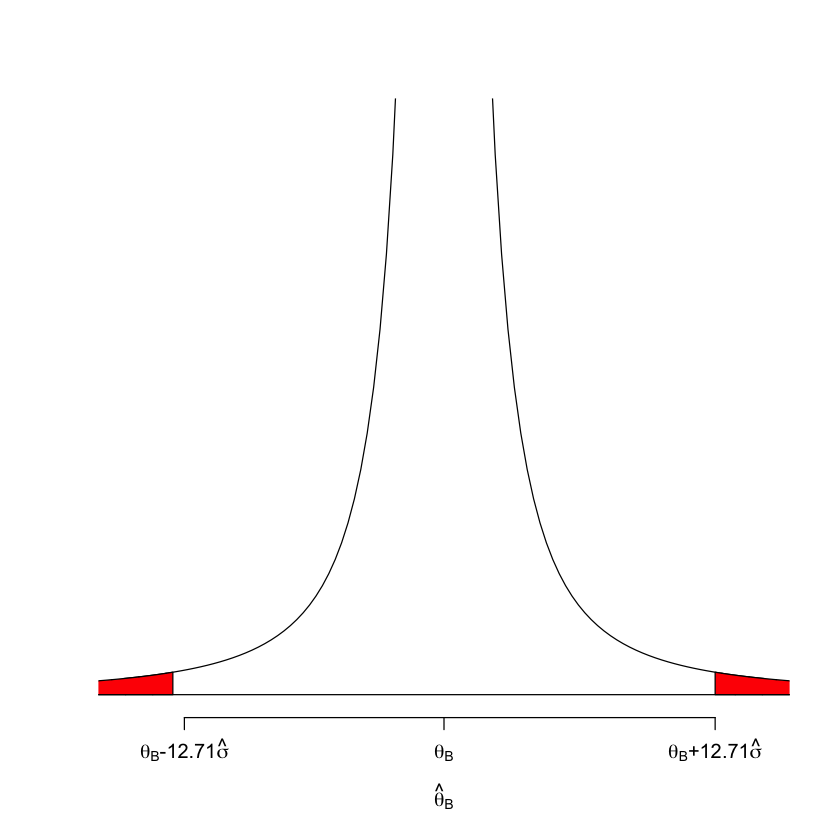

In [10]:
# Slide 37:

curve(dt(x,1),-15,15,axes=F,ylab='',ylim=c(0,0.05),
      xlab=expression(hat(theta)[B]))
lines(c(-20,20),rep(0,2))
polygon(c((-2000):(-1271)/100,rev((-2000):(-1271)/100)),
        c(rep(0,730),dt(rev((-2000):(-1271)/100),1)),col="red")
polygon(c((2000):(1271)/100,rev((2000):(1271)/100)),
        c(rep(0,730),dt(rev((2000):(1271)/100),1)),col="red")
axis(1,labels=c(expression(paste(theta[B],"-12.71",hat(sigma))),
                expression(theta[B]),
                expression(paste(theta[B],"+12.71",hat(sigma)))),
     at=c(-12.17,0,12.71))

In [11]:
# Slide 43:

Y<-c(0.3,1.5,1.3,1.9,4.2,8)
X<-cbind((1:6)^2)
Sigma<-diag((1:6)^2)
(thetahat<-solve(t(X)%*%solve(Sigma)%*%X)%*%t(X)%*%solve(Sigma)%*%Y)
(sigma2hat<-(1/(6-1))*t(Y-X%*%thetahat)%*%solve(Sigma)%*%(Y-X%*%thetahat))


0.189011


0.05965831


In [12]:
# Slide 45:

#sd:
qt(0.975,df=5)*sqrt(sigma2hat/91)

#ci:
thetahat-qt(0.975,df=5)*sqrt(sigma2hat/91)
thetahat+qt(0.975,df=5)*sqrt(sigma2hat/91)

100*(thetahat-qt(0.975,df=5)*sqrt(sigma2hat/91))
100*(thetahat+qt(0.975,df=5)*sqrt(sigma2hat/91))


0.06581823


0.1231928


0.2548292


12.31928


25.48292


In [13]:
# Slide 48:

qt(0.975,df=5)*sqrt(19100*sigma2hat/91)

# ci:
100*thetahat-qt(0.975,df=5)*sqrt(19100*sigma2hat/91)
100*thetahat+qt(0.975,df=5)*sqrt(19100*sigma2hat/91)

9.096261


9.804838


27.99736
